In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
status = ['Conserved','Unique to TAIR10']
iloci = ['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus']
Atha_counts = [26819,26819-26819,305,307-305,4478,5111-4478,8196,8244-8194,5,2]
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Atha_counts}

In [3]:
Atha = pd.DataFrame(data = d)
Atha_pivot = Atha.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Atha_pivot = Atha_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]
Atha_pivot

Status,Conserved,Unique to TAIR10
Type,,
siLocus,26819,0
ciLocus,305,2
niLocus,4478,633
iiLocus,8196,50
fiLocus,5,2


In [4]:
status = ['Conserved', 'Unique to 4.5']
Amel_counts = [6381,9895-6381,225,387-225,591,3083-591,1371,4165-1371,8,5083-8]
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Amel_counts}

In [5]:
Amel = pd.DataFrame(data = d)
Amel_pivot = Amel.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Amel_pivot = Amel_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]

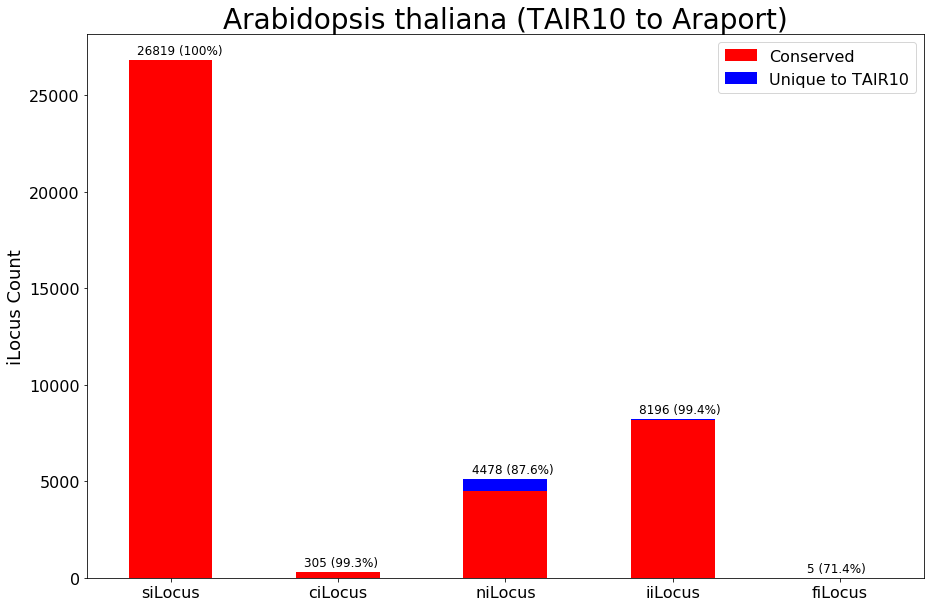

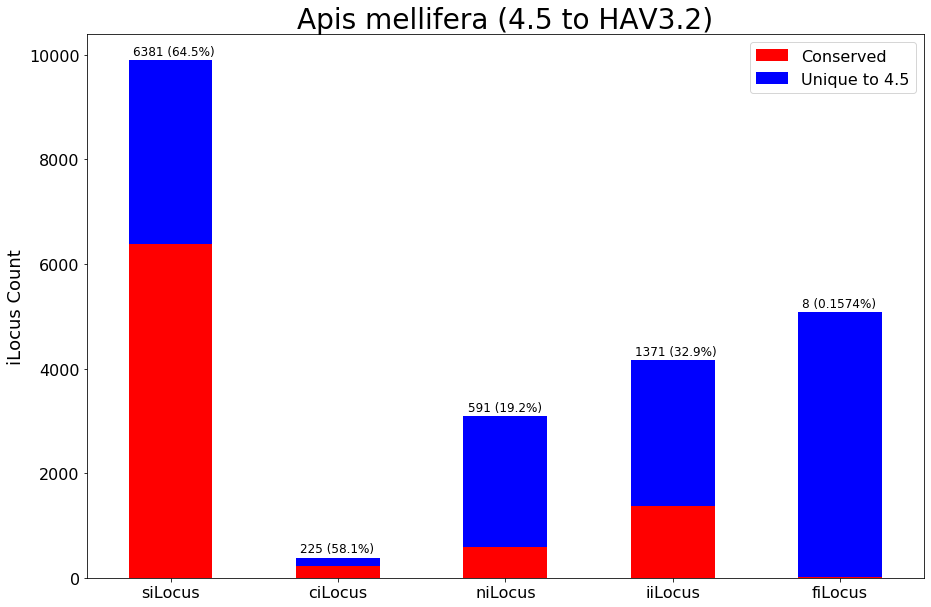

In [6]:
plot = Atha_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Arabidopsis thaliana (TAIR10 to Araport)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Atha_counts[2*i] / (Atha_counts[2*i] + Atha_counts[2*i + 1])
    if i == 0:
        conservation = int(round(conservation, 0))
    else:
        conservation = round(conservation, 1)
    plt.text(i-0.2, (Atha_pivot.sum(axis = 1)[i]) + 300, str(Atha_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)
plot = Amel_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Apis mellifera (4.5 to HAV3.2)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Amel_counts[2*i] / (Amel_counts[2*i] + Amel_counts[2*i + 1])
    if i == 4:
        conservation = round(conservation, 4)
    else:
        conservation = round(conservation, 1)
    plt.text(i-0.225, (Amel_pivot.sum(axis = 1)[i]) + 100, str(Amel_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)